# Completing waffle plot function

Waffle plot is one of the best alternatives to piechart, and can be a diversifying addition to your dashboard or a report. In my job I am trying to kill every single pie chart there is (they are so overused they will survive anyway, don't worry), so I recently found myself in need of a Waffle plot function. There is no built-in function for that in matplotlib, and I couldn't use pywaffle.

There is no point in reinventing the wheel, so I opened the browser and went through the web. I found a few functions, but discounting pywaffle and an attempted use of squarify, another third party library, there seemed to be only one way to do this, copied many times over by different people. Some of them added things to it, but it was mostly the same code, originally posted by Justin Fletcher on 3 Jan 2017 on Stack Overflow. It is a brilliant piece of code, however, as the author states clearly, it is not finished. So unfortunately, instead of having a solution straight away, some work was required to complete it. But the code I found was indeed a very good start.

Getting it to work was an interesting process, so I decided to document it here in hopes the way of thinking and the steps can help people in a similar situation. If you are here just for the function, just scroll to the bottom, or you can take it from Stack Overflow or my Github.

A starting note, I worked on the following:

# My specs

In [17]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [18]:
import platform
print('python version:', platform.python_version())
print('numpy version:', np.__version__)
print('matplotlib version:', mpl.__version__)

python version: 3.10.7
numpy version: 1.23.4
matplotlib version: 3.6.0


If you have a problem, you might have to update your libraries.

## The function:

In [19]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def waffle_plot(classes, values, height, width, colormap):

    # Compute the portion of the total assigned to each class.
    class_portion = [float(v)/sum(values) for v in values]

    # Compute the number of tiles for each catagories.
    total_tiles = width * height
    tiles_per_class = [round(p*total_tiles) for p in class_portion]

    # Make a dummy matrix for use in plotting.
    plot_matrix = np.zeros((height, width))

    # Popoulate the dummy matrix with integer values.
    class_index = 0
    tile_index = 0

    # Iterate over each tile.
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # If the number of tiles populated is sufficient for this class...
            if tile_index > sum(tiles_per_class[0:class_index]):

                # ...increment to the next class.
                class_index += 1       

            # Set the class value to an integer, which increases with class.
            plot_matrix[row, col] = class_index

    # Create a new figure.
    fig = plt.figure()

    # Using matshow solves your "non-square" problem. 
    plt.matshow(plot_matrix, cmap=colormap)
    plt.colorbar()

    # Get the axis.
    ax = plt.gca()

    # Minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True);
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True);

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    # Manually constructing a legend solves your "catagorical" problem.
    legend_handles = []
    for i, c in enumerate(classes):
        lable_str = c + " (" + str(values[i]) + ")"
        color_val = colormap(float(i+1)/len(classes))
        legend_handles.append(mpatches.Patch(color=color_val, label=lable_str))

    # Add the legend. Still a bit of work to do here, to perfect centering.
    plt.legend(handles=legend_handles, loc=1, ncol=len(classes),
               bbox_to_anchor=(0., -0.1, 0.95, .10))

    plt.xticks([])
    plt.yticks([])

The first part of the function creates a dummy array, which later is filled with values for each category, according to their proportion in the whole set. It's well commented, let's see:

The second part is plotting, using matshow to visualise the array. Colormap is used to assign colors to values of the array. Colorbar is showing the colorbar, grid controls the style of the grid. Legend is constructed to show categories and the values in brackets. Ticks are set to setup the grid and the numbers associated to the ticks are switched off at the very end.

## Let's see it in action:

In [20]:
import pandas as pd

# Let's make a default data frame with catagories and values.
df = pd.DataFrame({ 'categories': ['cat1', 'cat2', 'cat3', 'cat4'], 
                    'values': [84911, 14414, 10062, 8565] })

<Figure size 640x480 with 0 Axes>

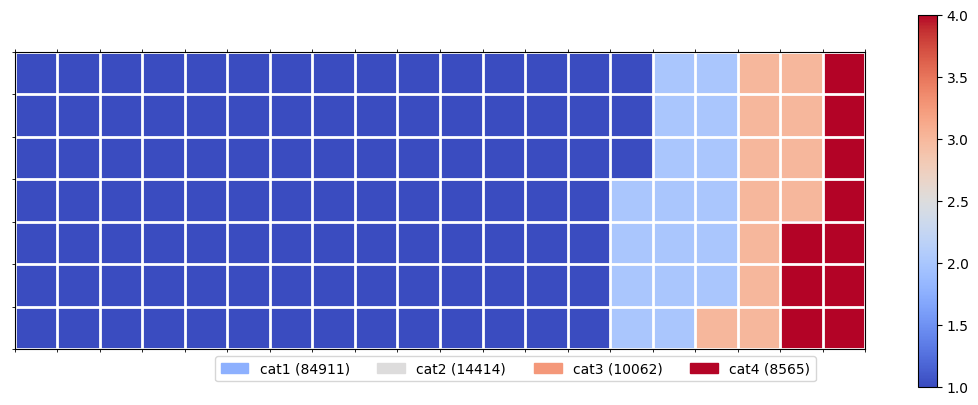

In [21]:
waffle_plot(df['categories'], df['values'], 7, 20, plt.cm.coolwarm)

It works, but straight away we can see a problem on the picture above: The colors in the legend doesn't correspond with the waffle plot. There is also something wrong with the Figure being empty. And there is colorbar, which in plot like this doesn't give us much, it's rather confusing. After closer inspection, it becomes apparent that the code will also struggle with extreme situations, like empty categories.

It really is a nice code, but it's not a finished solution. 

So let's finish it.

To summarise:

Things like that are never really complete, so we need to define our success conditions.

1) Colors can be properly controlled and the legend corresponds with the plot.
2) Function is resilient - it doesn't break or act very weirdly too easily. It is good enough to be used in automated processing.
3) Multiple aspects of the function can be controlled.



Let's start with some cosmetic changes, renaming variables, changing some comments, etc.

## First, let's deal with minor stuff: 
- reconnecting fig with ax
- removing colorbar (minimalist doctrine)
- renaming the variables and comments, including fixing one slight error
- reversing the order of height and width, to reflect matplotlib standard
- removing ticks that are sticking out of the figure
- changing adding strings with '+' to format strings 

I found the name of the variables 'class' and 'classes' confusing, so I changed it to 'category and' 'categories'. I renamed 'category_portion' to 'proportions'and 'waffle' to 'waffle'. I also changed colormap to cmap, because it's something I'm more used to.

In [22]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def waffle_plot(categories, values, width, height, cmap):

    # Compute the portion of the total assigned to each category.
    proportions = [float(v)/sum(values) for v in values]

    # Compute the number of tiles for each categories.
    total_tiles = width * height
    tiles_per_category = [round(p*total_tiles) for p in proportions]

    # Make a dummy matrix for use in plotting.
    waffle = np.zeros((height, width))

    # Popoulate the dummy matrix with integer values.
    category_index = 0
    tile_index = 0

    # Iterate over each tile.
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # If the number of tiles populated is sufficient for this category...
            if tile_index > sum(tiles_per_category[0:category_index]):

                # ...increment to the next category.
                category_index += 1       

            # Set the category value to an integer, which increases with category.
            waffle[row, col] = category_index

    # Create a new figure with ax
    fig, ax = plt.subplots(figsize=(13,7))
    
    ax.matshow(waffle, cmap=cmap)

    # Minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True);
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True);

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    # Constructing a legend
    legend_handles = []
    for i, c in enumerate(categories):
        lable_str = f'{c} ({values[i]})'
        color_val = cmap(float(i+1)/len(categories))
        legend_handles.append(mpatches.Patch(color=color_val, label=lable_str))

    # Add the legend
    plt.legend(handles=legend_handles, loc=1, ncol=len(categories),
               bbox_to_anchor=(0., -0.1, 0.95, .10))

    # Switch the sticking out ticks off (by setting length to 0):
    ax.tick_params(axis='both', which='both', length=0)
    
    plt.xticks([]);
    plt.yticks([]);

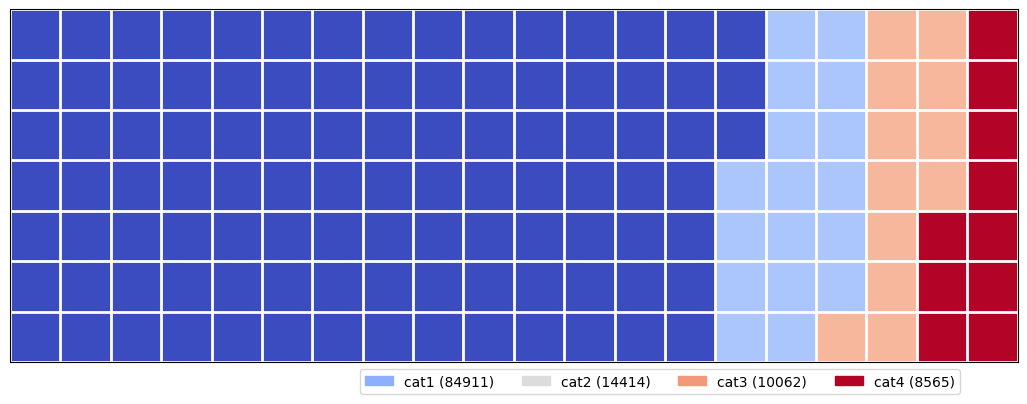

In [23]:
waffle_plot(df['categories'], df['values'], 20, 7, plt.cm.coolwarm)

That is more like it. It's a good place to start working on it.

In [24]:
# Let's define the values and categories first:
values = df['values']
categories = df['categories']

# 1) Proper color controls

### 1.1. Colormaps


With matshow, if we want to show colors, we will need a colormap. We can't easily change that, but we can change how we control colormap.

We can create a new colormap by resamping with the number of categories:

In [25]:
cmap = plt.cm.coolwarm

In [26]:
cmap = cmap.resampled(len(categories))

Main reason for this is to create a colormap with sharp divisions between colors, with the number of colors corresponding to our categories. The resusling colormap:

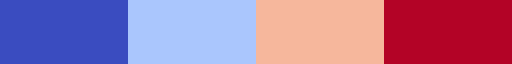

In [27]:
cmap

which is vastly different than the original colormap:

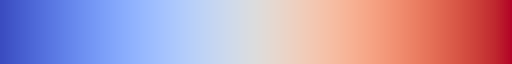

In [28]:
plt.cm.coolwarm

What's even more important, with resampled colormap we can access the colors the same way, irrespective of the previous colormap scale:

In [29]:
cmap(0)

(0.2298057, 0.298717966, 0.753683153, 1.0)

The call gives you an RGBA (red, green, blue, alpha) values for the color.

We can get a list of all colors seperately:

We are going to use it in the legend.

And so the legend corresponds better to the colors in the plot, we will have to change the way the legend is constructed:

In [30]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def waffle_plot(categories, values, width, height, cmap):

    cmap = cmap.resampled(len(categories))
    c = [cmap(x) for x in range(len(categories))]
    
    # Compute the portion of the total assigned to each category.
    proportions = [float(v)/sum(values) for v in values]

    # Compute the number of tiles for each categories.
    total_tiles = width * height
    tiles_per_category = [round(p*total_tiles) for p in proportions]

    # Make a dummy matrix for use in plotting.
    waffle = np.zeros((height, width))

    # Popoulate the dummy matrix with integer values.
    category_index = 0
    tile_index = 0

    # Iterate over each tile.
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # If the number of tiles populated is sufficient for this category...
            if tile_index > sum(tiles_per_category[0:category_index]):

                # ...increment to the next category.
                category_index += 1       

            # Set the category value to an integer, which increases with category.
            waffle[row, col] = category_index

    # Create a new figure with ax
    fig, ax = plt.subplots(figsize=(13,7))

    ax.matshow(waffle, cmap=cmap)

    # Minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True);
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True);

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    # Constructing a legend
    legend_handles = []
    for i, (category, colour) in enumerate(zip(categories, c)):
        label_str = f"{category} ({values[i]})"
        legend_handles.append(mpatches.Patch(color=c[i], label=label_str))

    # Add the legend
    plt.legend(handles=legend_handles, loc=1, ncol=len(categories),
               bbox_to_anchor=(0., -0.1, 0.95, .10))

    # Switch the sticking out ticks off (by setting length to 0):
    ax.tick_params(axis='both', which='both', length=0)
    
    plt.xticks([]);
    plt.yticks([]);

Now the colours in the plot should align well with the colours in the legend.

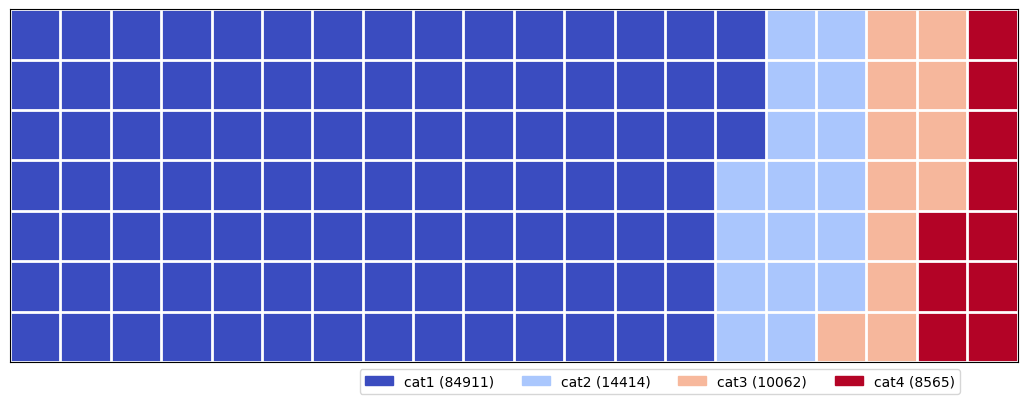

In [31]:
waffle_plot(df['categories'], df['values'], 20, 7, plt.cm.coolwarm)

Just to check if this will work with another colormap:

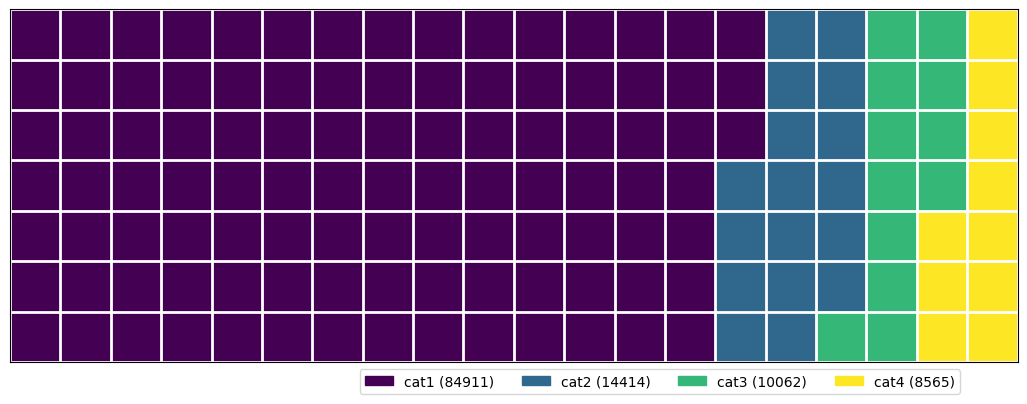

In [32]:
waffle_plot(df['categories'], df['values'], 20, 7, plt.cm.viridis)

### 1.2. Custom colors

Most of the time you will need to control the colors you are using. Perhaps it needs to be according to a company color scheme? With matshow, if we want to show colors, we will need a colormap. We can't easily change that, but that doesn't need we can't create our own colormap.

Additionally to 'cmap', let's introduce a variable 'c', for colors. We will use it to create our own colormap. For the sake of the example, basic matplotlib one-letter color names will do just fine:

In [33]:
from matplotlib.colors import LinearSegmentedColormap

c = ['b', 'g', 'c', 'k']

n_bins = len(values)

#c_for_cmap = c[:n_bins]

cmap_name = 'the_cmap'
cmap = LinearSegmentedColormap.from_list(cmap_name, c, N=n_bins)

Thanks to this, we get a colormap composed from our colors:

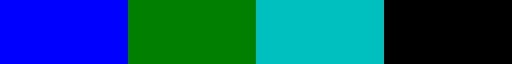

In [34]:
cmap

The disadvantage of constructing the list of colors and passing it to the function is that we need to be careful to make the list the exact same length as the list of categories.

Now, we have to weave in the new variable into an existing function. With two variables controlling the same aspect (colors), we have to decide which is going to be the default. Colormap seems like an easier and safer option, because you don't have to specify the number of colors.

Furthermore, we can use the colormap to overcome the weakness of passing the list of colors. If the list of colors is shorter than the number of categories, the remaining categories can get the color from the colormap.

We are going to set viridis as the default colormap, because 1) it's neat, 2) it's matplotlib default colormap, 3) you can always change it.

The resulting code:

In [35]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

def waffle_plot(categories, values, width=20, height=7, cmap=plt.cm.viridis, c=None):
    
    cmap = cmap.resampled(len(categories))
    
    if c is None:
    
        c = [cmap(x) for x in range(len(categories))]
        
    else:
        # If there are fewer colors than categories...
        if len(c) < len(categories):
            # Extend list c with appropriate number of colors from colormap
            c.extend([cmap(x) for x in range(len(categories))][len(c):])
            
        n_categories=categories.count()

        n_bins = len(values)

        cmap_name = 'the_cmap'
        cmap = LinearSegmentedColormap.from_list(cmap_name, c, N=n_bins)
    
    # Compute the portion of the total assigned to each category.
    proportions = [float(v)/sum(values) for v in values]

    # Compute the number of tiles for each categories.
    total_tiles = width * height
    tiles_per_category = [round(p*total_tiles) for p in proportions]

    # Make a dummy matrix for use in plotting.
    waffle = np.zeros((height, width))

    # Popoulate the dummy matrix with integer values.
    category_index = 0
    tile_index = 0

    # Iterate over each tile.
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # If the number of tiles populated is sufficient for this category...
            if tile_index > sum(tiles_per_category[0:category_index]):

                # ...increment to the next category.
                category_index += 1       

            # Set the category value to an integer, which increases with category.
            waffle[row, col] = category_index

    # Create a new figure with ax
    fig, ax = plt.subplots(figsize=(13,7))

    ax.matshow(waffle, cmap=cmap)

    # Minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True);
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True);

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    # Constructing a legend
    legend_handles = []
    for i, (category, colour) in enumerate(zip(categories, c)):
        label_str = f"{category} ({values[i]})"
        legend_handles.append(mpatches.Patch(color=c[i], label=label_str))

    # Add the legend
    plt.legend(handles=legend_handles, loc=1, ncol=len(categories),
               bbox_to_anchor=(0., -0.1, 0.95, .10))

    # Switch the sticking out ticks off (by setting length to 0):
    ax.tick_params(axis='both', which='both', length=0)
    
    plt.xticks([]);
    plt.yticks([]);

Now if we don't pass any colors, colormap will be used:

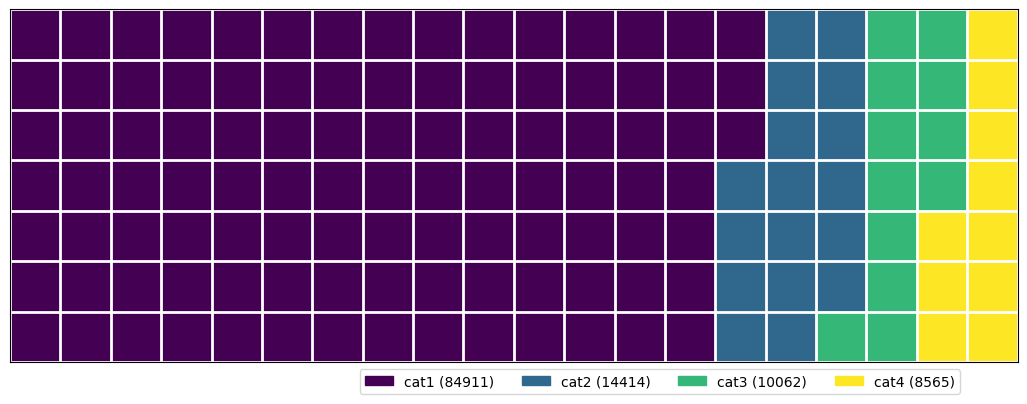

In [36]:
waffle_plot(df['categories'], df['values'])

If we want to change the colormap, we can:

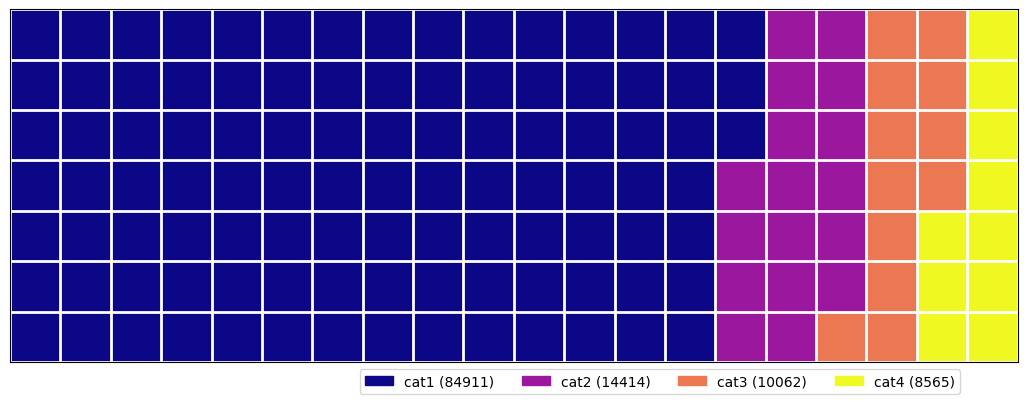

In [37]:
waffle_plot(df['categories'], df['values'], 20, 7, cmap=plt.cm.plasma)

If we pass a list of colors, those colors will be used instead:

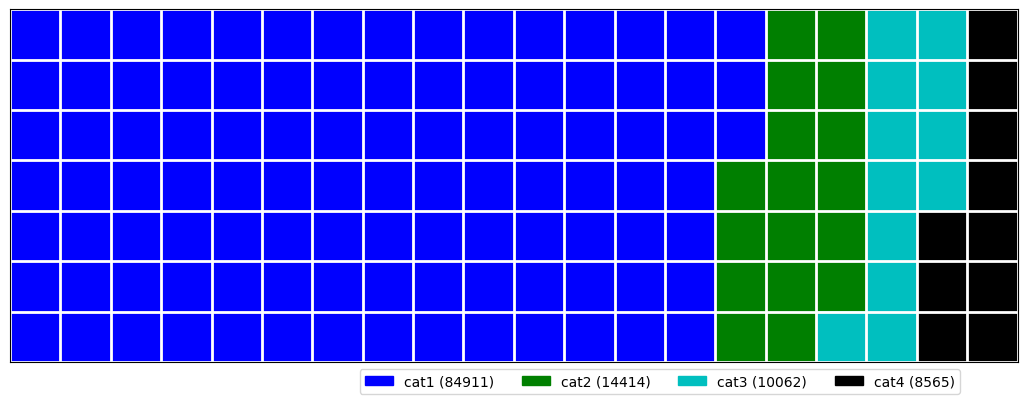

In [38]:
waffle_plot(df['categories'], df['values'], 20, 7, c=['b', 'g', 'c', 'k'])

And if we pass too few colors, the missing colors will be taken from colormap:

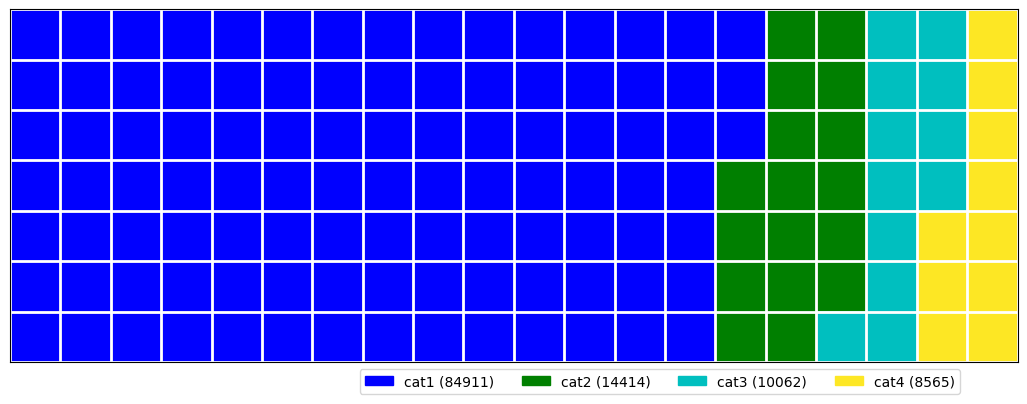

In [39]:
waffle_plot(df['categories'], df['values'], 20, 7, c=['b', 'g', 'c'])

With this, the code will show the correct colors for categories, corresponding with the legend. Provided that there is more than one category, no category is zero, and there isn't any big disproprotion in the data...

... Clearly, we have a lot more to do.

# Sorting

To make the plot more readable and to avoid some potential problems, we want the biggest categories on the left, and the smallest on the right. It will also help us deal with the '0' value, because we will be able to just cut out the ones at the very end if they are '0'. To do this, we will have to introduce sorting, for both values and categories. The plot is already using numpy, so let's use numpy.

# Resilience

As a side effect of the changes we've made, the situation with only one category now ends up with an error. To deal with it, we will have to add an 'if' statement, that will make waffle transparent:

The color for the alternative plot we can assign with set_facecolor, using the first of our colors:

If all categories are empty, we get 'ZeroDivisionError: float division by zero'. To be fair, it's an odd thing to be prepared for. This doesn't work even in pywaffle. But if we want our function to be able to run with automated processes...

We can deal with all categories being empty by adding a simple if statement at the beginning, to avoid division by 0, and creating unnecessary cmap:

To add a bit of clarity, we can also add another if statement (or rather change the existing one), that would change the colour to light grey if every category is 0.

Alright, with this, colors are pretty much set. Let's move on to differences in scale.

Differences in scale can be problematic for a waffle plot with arbitrary number of tiles. There are two ways of dealing with this, and the simplest one is... if it's too small, just not show it in the data.

We can achieve that by adding a small piece of code, that will further reduce number of bins if they don't fit in the plot:

The updated function:

In [40]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

def waffle_plot(categories, values, width=20, height=7, cmap=plt.cm.viridis, c=None):


    # stacking arrays into one matrix
    a = np.vstack((categories, values)) # if you want colors assign to categories, you can add c here as well

    # Transposing into dataframe-like format
    a = a.transpose()

    # Sorting the array by value, descending
    a = a[a[:, 1].argsort()[::-1]]

    # Getting sorted categories and values
    categories = a[:, 0]
    values = a[:, 1]

    # Getting number of categories
    n_categories = a[:, 0].size


    # Getting number of bins. We don't need bins for empty (== 0) categories, as we are only counting non-zero values
    n_bins = np.count_nonzero(a[:, 1])

    # Perpare the data for the plot
    
    cmap = cmap.resampled(len(categories))
    
    if c is None:
    
        c = [cmap(x) for x in range(len(categories))]
        
    else:
        # If there are fewer colors than categories...
        if len(c) < len(categories):
            # Extend list c with appropriate number of colors from colormap
            c.extend([cmap(x) for x in range(len(categories))][len(c):])
        
        if len(c) > len(categories):
            # Cutting colour list in case we have more colours than categories
            c = c[:n_categories]
        
    # Instead of 'c', using special version 'c_for_cmap', that is cut at the length equal to number of bins
    c_for_cmap = c[:n_bins]

    proportions_cmap = [(float(value) / sum(values)) for value in values if value > 0]

    total = width * height

    tiles_per_category = [round(proportion * total) for proportion in proportions_cmap]

    # Make a dummy matrix for use in plotting.
    waffle = np.zeros((height, width))

    # Popoulate the dummy matrix with integer values.
    category_index = 0
    tile_index = 0

    # Iterate over each tile.
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # If the number of tiles populated is sufficient for this category...
            if tile_index > sum(tiles_per_category[0:category_index]):

                # ...increment to the next category.
                category_index += 1

            # Set the category value to an integer, which increases with category.
            waffle[row, col] = category_index


    # Getting number of bins. We don't need bins for empty (== 0) categories, s we are only counting non-zero values
    n_bins = np.count_nonzero(a[:, 1])


    # If number of unique values in waffle is smaller than number of bins, reduce number of bins
    if len(np.unique(waffle)) < n_bins:
        n_bins = len(np.unique(waffle))

    c_for_cmap = c[:n_bins]

    if any(values) != 0:
        cmap_name = 'the_cmap'
        cmap = LinearSegmentedColormap.from_list(cmap_name, c_for_cmap, N=n_bins)

        # Compute the portion of the total assigned to each category.
        proportions = [(float(value) / sum(values)) for value in values]

    else:
        proportions = [1 for v in values]

    # Create a new figure with ax
    fig, ax = plt.subplots(figsize=(13,7))

    # Using matshow solves your "non-square" problem. 
    if len(c_for_cmap) > 1:
        ax.matshow(waffle, cmap=cmap)
    else:
        ax.matshow(waffle, alpha=0)

    # With colours control, to not get an empty plot for only one not empty category,a facecolor has to be set:

    if len(c_for_cmap) < 1:
        ax.set_facecolor('lightgrey')
    elif len(c_for_cmap) < 2:
        ax.set_facecolor(c[0])


    # Minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True);
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True);

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    # Manually constructing a legend solves your "catagorical" problem.
    legend_handles = []
    for i, (category, colour) in enumerate(zip(categories, c)):
        label_str = f"{category} ({values[i]})"
        legend_handles.append(mpatches.Patch(color=c[i], label=label_str))

    # Add the legend. Still a bit of work to do here, to perfect centering.
    plt.legend(handles=legend_handles, loc=1, ncol=len(categories),
               bbox_to_anchor=(0., -0.1, 0.95, .10))

    # Switch the sticking out ticks off (by setting length to 0):
    ax.tick_params(axis='both', which='both', length=0)
    
    plt.xticks([]);
    plt.yticks([]);

In [41]:
df5 = df.copy()
df5.loc[df5['categories'] == 'cat4', 'values'] = 1

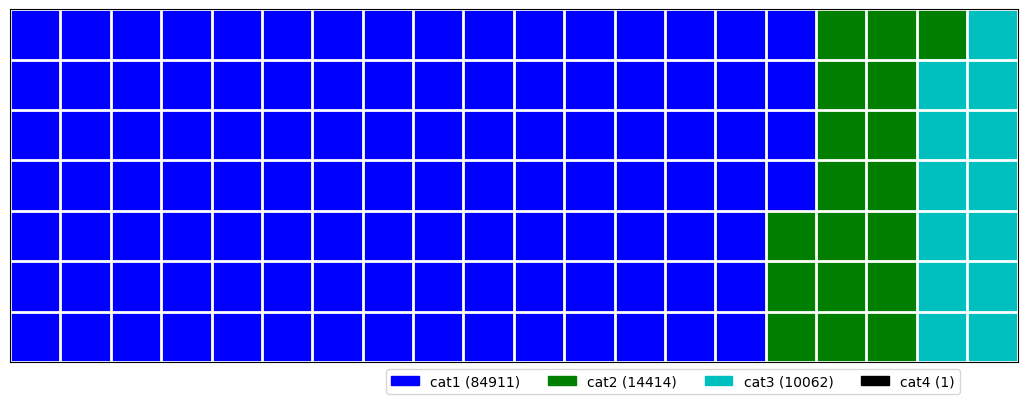

In [42]:
waffle_plot(df5['categories'], df5['values'], 20, 7, c = ['b', 'g', 'c', 'k', 'r'])

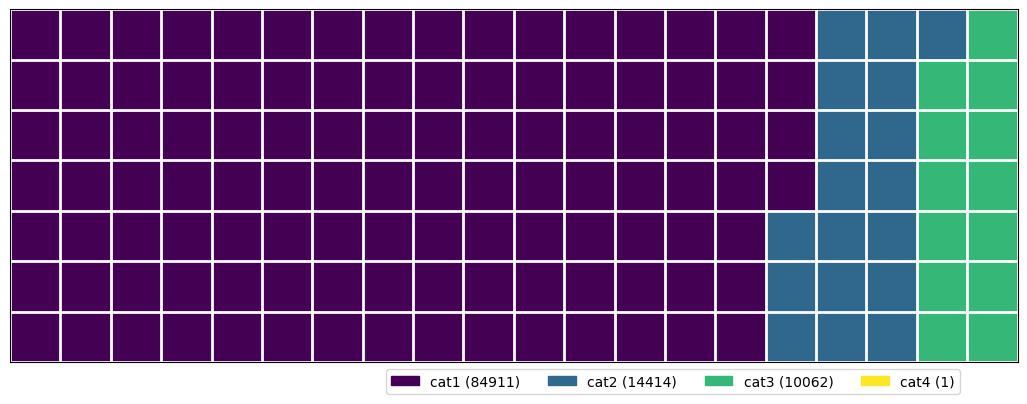

In [43]:
waffle_plot(df5['categories'], df5['values'], 20, 7)

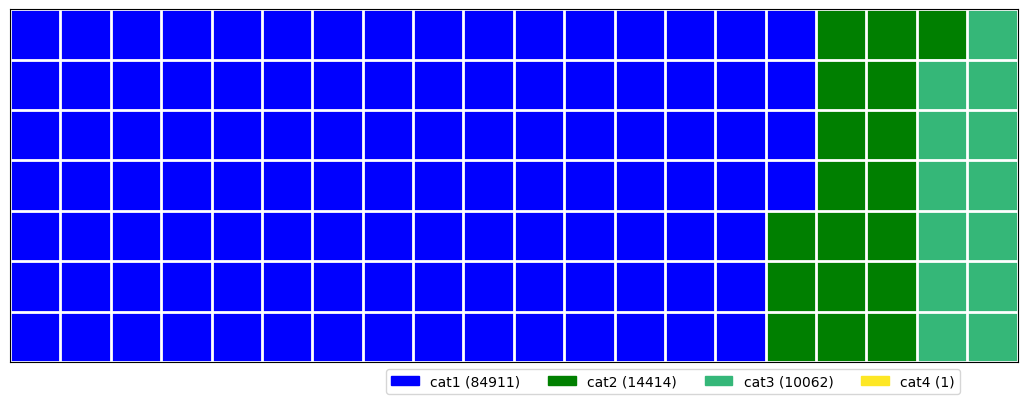

In [44]:
waffle_plot(df5['categories'], df5['values'], 20, 7, c=['b', 'g'])

If you want a colour to be tied to the category, you will have to add it to the array before sorting.

We have a robust, working function, that can be used even with automated processing.

Still, this is is just the beginning. This function can still be improved. Let's add some...

# 3. Additional features

There are different ways of dealing with disproportions in the data. For example:

#### Autoscaling

Introduce auto-scaling, that would add a number of tiles until it can have space for the last tile. This tile can be empty, if the the last category takes less than 50% of it, or full, if it's over 50%.

With auto-scaling, we can add a final parameter, called 'overrepresent', that would always make the final tile the color of the final category.

So we are introducing the 'condition' variable and a while loop. The variable depends on the checks if there are less categories in the waffle array that there are non-zero values in the dataframe (represented by the length of cmap proportions, which we already have). If this is the case, the condition is False, and each dimension of the waffle gains a tile. The check is repeated in the loop until it is met.

Please bear in mind, that this autoscaling will add the same number of tiles in each dimension, so unless it's a square, it won't keep the exact proportions. But it should be fairly close.

if we don't want to overrepresent the smallest category, but still have a place for it on the plot, we can introduce an empty tile.

To do this safely, we need a check to make sure we actually need that. The simplest way to do this, is to introduce a check for the conditions in which we actually need that, and when we do - change the color to white (or whatever color of the background). We will also add a variable 'overrepresent' to switch it on and off:

#### Changing the direction of the plot

Perhaps you would like to see the tiles arranged horizontally, instead of vertically?

The orientation is dicated by the order in which dummy array is overwritten:

To control this, we will introduce if statements with a variable called 'vertical', that would be True by default, but could be changed to False. Then the function would become horizontal.

With the new features, the function would look like this:

In [45]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

def waffle_plot(categories, values, width=20, height=7, cmap=plt.cm.viridis, c=None, autoscale=True, 
                over_represent=False, vertical=True):

    # stacking arrays into one matrix
    a = np.vstack((categories, values)) # if you want colors assign to categories, you can add c here as well

    # Transposing into dataframe-like format
    a = a.transpose()

    # Sorting the array by value, descending
    a = a[a[:, 1].argsort()[::-1]]

    # Getting sorted categories and values
    categories = a[:, 0]
    values = a[:, 1]

    # Getting number of categories
    n_categories = a[:, 0].size

    # Getting number of bins. We don't need bins for empty (== 0) categories, s we are only counting non-zero values
    n_bins = np.count_nonzero(a[:, 1])
    
    cmap = cmap.resampled(len(categories))
    
    if c is None:
    
        c = [cmap(x) for x in range(len(categories))]
        
    else:
        # If there are fewer colors than categories...
        if len(c) < len(categories):
            # Extend list c with appropriate number of colors from colormap
            c.extend([cmap(x) for x in range(len(categories))][len(c):])
        
        if len(c) > len(categories):
            # Cutting colour list in case we have more colours than categories
            c = c[:n_categories]

    proportions_cmap = [(float(value) / sum(values)) for value in values if value > 0]


    # autoscaling

    if autoscale:
        
        # condition variable for 'while' loop
        condition=False

        while condition is not True:

            total = width * height

            tiles_per_category = [round(proportion * total) for proportion in proportions_cmap]

            # Make a dummy matrix for use in plotting.
            waffle = np.zeros((height, width))

            # Popoulate the dummy matrix with integer values.
            category_index = 0
            tile_index = 0

            if vertical:
                # Iterate over each tile.
                for col in range(width):
                    for row in range(height):
                        tile_index += 1
                        

                        # If the number of tiles populated is sufficient for this category...
                        if tile_index > sum(tiles_per_category[0:category_index]):

                            # ...increment to the next category.
                            category_index += 1

                        # Set the category value to an integer, which increases with category.
                        waffle[row, col] = category_index


            if vertical is False:  
                # Iterate over each tile.
                for row in range(height):
                    for col in range(width):
                        tile_index += 1

                        # If the number of tiles populated is sufficient for this category...
                        if tile_index > sum(tiles_per_category[0:category_index]):

                            # ...increment to the next category.
                            category_index += 1

                        # Set the category value to an integer, which increases with category.
                        waffle[row, col] = category_index

            if len(np.unique(waffle)) < len(proportions_cmap):
                condition = False
                width +=1
                height +=1

            else:
                condition = True
                    
    else:
        # if autoscale is off:

        total = width * height

        tiles_per_category = [round(proportion * total) for proportion in proportions_cmap]

        # Make a dummy matrix for use in plotting.
        waffle = np.zeros((height, width))

        # Popoulate the dummy matrix with integer values.
        category_index = 0
        tile_index = 0

        if vertical:
            # Iterate over each tile.
            for col in range(width):
                for row in range(height):
                    tile_index += 1


                    # If the number of tiles populated is sufficient for this category...
                    if tile_index > sum(tiles_per_category[0:category_index]):

                        # ...increment to the next category.
                        category_index += 1

                    # Set the category value to an integer, which increases with category.
                    waffle[row, col] = category_index



        if vertical is False:  
            # Iterate over each tile.
            for row in range(height):
                for col in range(width):
                    tile_index += 1

                    # If the number of tiles populated is sufficient for this category...
                    if tile_index > sum(tiles_per_category[0:category_index]):

                        # ...increment to the next category.
                        category_index += 1

                    # Set the category value to an integer, which increases with category.
                    waffle[row, col] = category_index

        
    # Instead of 'c', using special version 'c_for_cmap', that is cut at the length equal to number of bins
    c_for_cmap = c[:n_bins]
        
    if autoscale is False:
        # If number of unique values in waffle is smaller than number of bins, reduce number of bins
        if len(np.unique(waffle)) < n_bins:
            n_bins = len(np.unique(waffle))

    # Instead of 'c', using special version 'c_for_cmap', that is cut at the length equal to number of bins
    c_for_cmap = c[:n_bins]
    
    if not over_represent and len(c_for_cmap) == np.count_nonzero(a[:, 1]):
        for i in proportions_cmap:
            if i < 0.5 * (1 / (height*width)):
                c_for_cmap[-1] = 'w'

    if any(values) != 0:
        cmap_name = 'the_cmap'
        cmap = LinearSegmentedColormap.from_list(cmap_name, c_for_cmap, N=n_bins)

        # Compute the portion of the total assigned to each category.
        proportions = [(float(value) / sum(values)) for value in values]

    else:
        proportions = [1 for v in values]

    # Create a new figure with ax
    fig, ax = plt.subplots(figsize=(13,7))

    if len(c_for_cmap) > 1:
        # Visualisng the waffle array as waffle plot
        ax.matshow(waffle, cmap=cmap)
    else:
        # Visualisng the waffle array as waffle plot, only transparent
        ax.matshow(waffle, alpha=0)

    # With colours control, to not get an empty plot for only one not empty category,a facecolor has to be set:

    if len(c_for_cmap) < 1:
        ax.set_facecolor('lightgrey')
    elif len(c_for_cmap) < 2:
        ax.set_facecolor(c[0])


    # Minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True);
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True);

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    # Manually constructing a legend solves your "catagorical" problem.
    legend_handles = []
    for i, (category, colour) in enumerate(zip(categories, c)):
        label_str = f"{category} ({values[i]})"
        legend_handles.append(mpatches.Patch(color=c[i], label=label_str))

    # Add the legend. Still a bit of work to do here, to perfect centering.
    plt.legend(handles=legend_handles, loc=1, ncol=len(categories),
               bbox_to_anchor=(0., -0.1, 0.95, .10))

    # Switch the sticking out ticks off (by setting length to 0):
    ax.tick_params(axis='both', which='both', length=0)
    
    plt.xticks([]);
    plt.yticks([]);

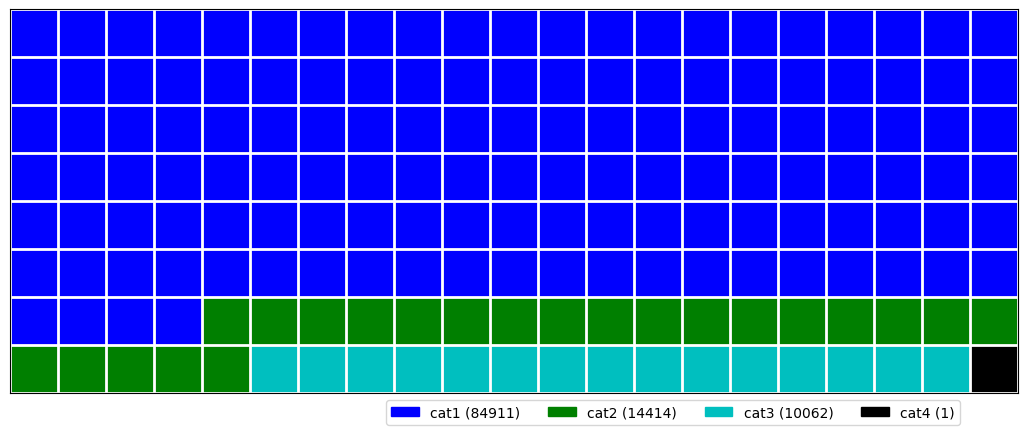

In [46]:
waffle_plot(df5['categories'], df5['values'], 20, 7, c = ['b', 'g', 'c', 'k'], autoscale=True, over_represent=True,
           vertical=False)

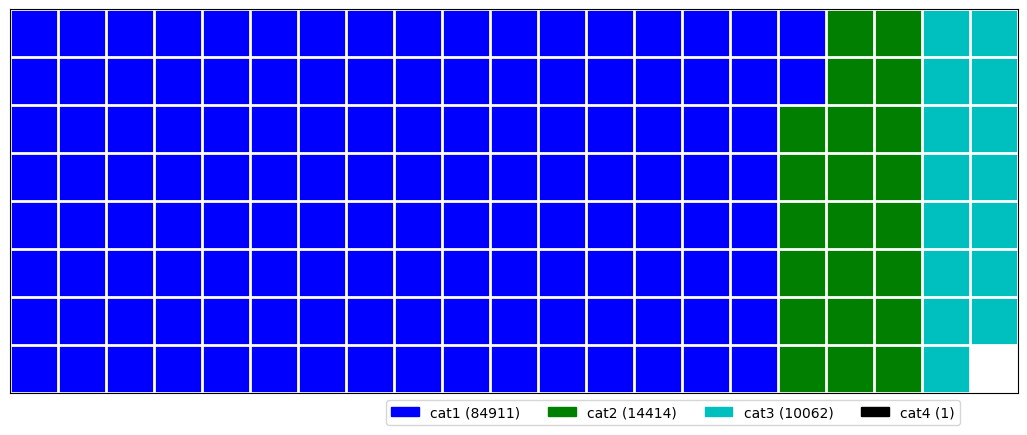

In [47]:
waffle_plot(df5['categories'], df5['values'], 20, 7, c = ['b', 'g', 'c', 'k'])

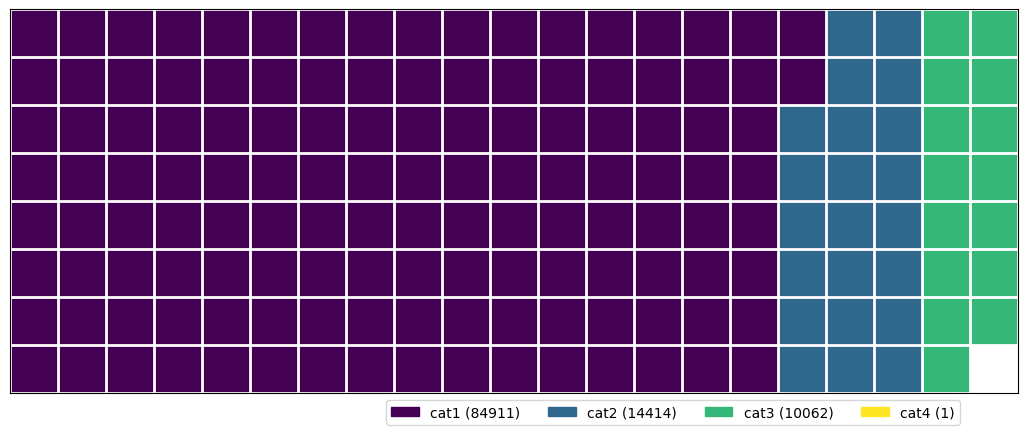

In [48]:
waffle_plot(df5['categories'], df5['values'], 20, 7)

So we have a basic function now. Main part is done. 

But we still can make it much more useful. Our goal is to make it very easy to use by default, but also modifiable enough so it's not limitng. We can add a lot more controls for it, and assign some default values, so calling the function won't be a hassle:

- width and height both set to 10 (I prefere the square plot) and reverse the order, so it feels more natural, 
- some named matplotlib one-letter colors (with red moved to the very end), so the plot works by default without passing the list
- options to switch autoscale and over_represent on and off, are already in
- size of the plot
- shape and location of the legend
- parameters to construct the legend a bit better, with an option to calculate percentages and showing signs
- controls for the font and font color
- controls for the color of the background
- finally, option to save the picture

Apart from that, it would be nice to have some adjustments to grid lines width, so it doesn't overshadow the tiles if they are tiny.

Part with adding the value_sign I've taken from another post on Towards Data Science, https://towardsdatascience.com/waffle-charts-using-pythons-matplotlib-94252689a701 by Rashida Nasrin Sucky. Good addition, that makes the function easier to use in certain scenarios.

The final product:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

def waffle_plot(categories, values,
                width=10, 
                height=10,
                cmap=plt.cm.viridis,
                c=None,
                bc = 'w',
                autoscale=True,
                over_represent = False,
                vertical=True,
                label_v=True, 
                label_p=False,
                legend_ncols=1, 
                legend_loc=(1.35, 0.695),
                figsize=(6.4, 4.8),
                value_sign = '',
                font='DejaVu Sans',
                font_c='black',
                save=None,
                ):

    """
    Parameters:

    values: str
        Name of the column in dataframe contaning values.
    categories: str
        Name of the column in dataframe containing categories.
    width: int, default 10
        Width of the plot in patches (squares).
    height: int, default 10
        Width of the plot in patches (squares).
    c: list, default ['b', 'g', 'r', 'c', 'm', 'y',  'k', 'w']
        List of discreet colours that will be used to create colormap and Legend.
    bc: str, list or tuple, default 'w'
        Background color. It also controls color of the grid.
    autoscale: bool, default True
        If autoscale is on, the number of patches will grow until it can
        accomodate the smallest non-zero value from values.
    over_represent: bool, default False
        Works if autoscale is True, otherwise has no effect.
        If the smallest category has one tile and fills less than 50% of it, 
        if over_represent is True, the tile will still have the category color.
        If over_represent is False, the tile will have the color of the 
        background.
    vertical: bool, default True
        Alignment of tiles in the waffle. If set to False, alignment is horizontal.
    label_v: bool, default True
        Label value - when True, it add value in brackets to the legend.
        If value contains % sign, it will add it to the Legend.
    label_p: bool, default False
        Label percentage - when True, the function calculates the percentage 
        of the value and adds it in brackets to the legend.
        When both label_v and label_p are True, it will add both, value after
        colon and percentage in brackets.
    legend_ncols: int, default 1
        Legend control, it allows to put categories in more than one column. 
        To make flat horizontal Legend, it should equal the number of categories.
    figsize: tuple, default (6.4, 4.8)
        Size of the whole figure.
    font: str, default 'DejaVu Sans'
        Specifies font used in the legend.
    save: str or path object, default None
        Specifies the location to which the file will be saved. If None,
        plt.show() is used instead.
    """

    # stacking arrays into one matrix
    a = np.vstack((categories, values)) # if you want colors assign to categories, you can add c here as well

    # Transposing into dataframe-like format
    a = a.transpose()

    # Sorting the array by value, descending
    a = a[a[:, 1].argsort()[::-1]]

    # Getting sorted categories and values
    categories = a[:, 0]
    values = a[:, 1]

    # Getting number of categories
    n_categories = a[:, 0].size

    cmap = cmap.resampled(len(categories))
    
    if c is None:
    
        c = [cmap(x) for x in range(len(categories))]
        
    else:
        # If there are fewer colors than categories...
        if len(c) < len(categories):
            # Extend list c with appropriate number of colors from colormap
            c.extend([cmap(x) for x in range(len(categories))][len(c):])
        
        if len(c) > len(categories):
            # Cutting colour list in case we have more colours than categories
            c = c[:n_categories]

    proportions_cmap = [(float(value) / sum(values)) for value in values if value > 0]


    # autoscaling

    if autoscale:
        
        # condition variable for 'while' loop
        condition=False

        while condition is not True:

            total = width * height

            tiles_per_category = [round(proportion * total) for proportion in proportions_cmap]

            # Make a dummy matrix for use in plotting.
            waffle = np.zeros((height, width))

            # Popoulate the dummy matrix with integer values.
            category_index = 0
            tile_index = 0

            if vertical:
                # Iterate over each tile.
                for col in range(width):
                    for row in range(height):
                        tile_index += 1
                        

                        # If the number of tiles populated is sufficient for this category...
                        if tile_index > sum(tiles_per_category[0:category_index]):

                            # ...increment to the next category.
                            category_index += 1

                        # Set the category value to an integer, which increases with category.
                        waffle[row, col] = category_index


            if vertical is False:  
                # Iterate over each tile.
                for row in range(height):
                    for col in range(width):
                        tile_index += 1

                        # If the number of tiles populated is sufficient for this category...
                        if tile_index > sum(tiles_per_category[0:category_index]):

                            # ...increment to the next category.
                            category_index += 1

                        # Set the category value to an integer, which increases with category.
                        waffle[row, col] = category_index

            if len(np.unique(waffle)) < len(proportions_cmap):
                condition = False
                width +=1
                height +=1

            else:
                condition = True
                    
    else:
        # if autoscale is off:

        total = width * height

        tiles_per_category = [round(proportion * total) for proportion in proportions_cmap]

        # Make a dummy matrix for use in plotting.
        waffle = np.zeros((height, width))

        # Popoulate the dummy matrix with integer values.
        category_index = 0
        tile_index = 0

        if vertical:
            # Iterate over each tile.
            for col in range(width):
                for row in range(height):
                    tile_index += 1


                    # If the number of tiles populated is sufficient for this category...
                    if tile_index > sum(tiles_per_category[0:category_index]):

                        # ...increment to the next category.
                        category_index += 1

                    # Set the category value to an integer, which increases with category.
                    waffle[row, col] = category_index



        if vertical is False:  
            # Iterate over each tile.
            for row in range(height):
                for col in range(width):
                    tile_index += 1

                    # If the number of tiles populated is sufficient for this category...
                    if tile_index > sum(tiles_per_category[0:category_index]):

                        # ...increment to the next category.
                        category_index += 1

                    # Set the category value to an integer, which increases with category.
                    waffle[row, col] = category_index


    # Getting number of bins. We don't need bins for empty (== 0) categories, s we are only counting non-zero values
    n_bins = np.count_nonzero(a[:, 1])
    
    
    if autoscale is False:
        # If number of unique values in waffle is smaller than number of bins, reduce number of bins
        if len(np.unique(waffle)) < n_bins:
            n_bins = len(np.unique(waffle))

    # Instead of 'c', using special version 'c_for_cmap', that is cut at the length equal to number of bins
    c_for_cmap = c[:n_bins]
    
    if not over_represent and len(c_for_cmap) == np.count_nonzero(a[:, 1]):
        for i in proportions_cmap:
            if i < 0.5 * (1 / (height*width)):
                c_for_cmap[-1] = bc

    if any(values) != 0:
        
        # Constructing colormap
        cmap_name = 'the_cmap'
        cmap = LinearSegmentedColormap.from_list(cmap_name, c_for_cmap, N=n_bins)

        # Compute the portion of the total assigned to each category.
        proportions = [(float(value) / sum(values)) for value in values]

    else:
        proportions = [1 for v in values]

    # Grid line auto-adjustment
    if height < 25 and width < 25:
        linewidth = 1
    else:
        linewidth = 0.5

    # Create a new figure with ax
    fig, ax = plt.subplots(figsize=figsize, facecolor=bc)

    if len(c_for_cmap) > 1:
        # Visualisng the waffle array as waffle plot
        ax.matshow(waffle, cmap=cmap)
    else:
        # Visualisng the waffle array as waffle plot, only transparent
        ax.matshow(waffle, alpha=0)

    # With colours control, to not get an empty plot for only one not empty category,
    #a facecolor has to be set. Same for the special case of empty waffle.

    if len(c_for_cmap) < 1:
        ax.set_facecolor('lightgrey')
    elif len(c_for_cmap) < 2:
        ax.set_facecolor(c[0])

    # Minor ticks
    ax.set_xticks(np.arange(-0.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, (height), 1), minor=True)

    # Switch the sticking out ticks off (by setting length to 0):
    ax.tick_params(axis='both', which='both', length=0)

    # Gridlines based on minor ticks
    ax.grid(which='minor', color=bc, linestyle='-', linewidth=linewidth)

    # Switch off the numbers associated with ticks
    plt.xticks([])
    plt.yticks([])

    # variables for the legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]
    
    #Empty list, that will be filled with legend handles
    legend_handles = []

    # Constructing the legend. Depending on the controls, it can have:

    # Values only, with the sign, or without it
    if label_v and not label_p:
        for i, (category, colour) in enumerate(zip(categories, c)):
            if value_sign == '%':
                label_str = f"{category} ({values[i]}{value_sign})" 
            else:
                label_str = f"{category} ({value_sign}{values[i]})"
            legend_handles.append(mpatches.Patch(color=c[i], label=label_str))

    # Values and percentages in brackets, calculated automatically
    if label_v and label_p:
        for i, (category, colour) in enumerate(zip(categories, c)):
            if value_sign == '%':
                label_str = f"{category}: {values[i]}{value_sign} ({proportions[i] * 100:.2f}%)"
            else:
                label_str = f"{category}: {value_sign}{values[i]} ({proportions[i] * 100:.2f}%)"
            legend_handles.append(mpatches.Patch(color=c[i], label=label_str))

    # only percentages calculated automatically
    if not label_v and label_p:
        for i, (category, colour) in enumerate(zip(categories, c)):
            label_str = f"{category} ({proportions[i] * 100:.2f}%)" 
            legend_handles.append(mpatches.Patch(color=c[i], label=label_str))

    # Just the name of the category, no values and no percentages
    if not label_v and not label_p:
        for i, (category, colour) in enumerate(zip(categories, c)):
            label_str = f"{category}" 
            legend_handles.append(mpatches.Patch(color=c[i], label=label_str))

    # Add the legend
    l = ax.legend(handles=legend_handles, loc = 'lower center', ncol=legend_ncols,
              labelcolor=font_c, bbox_to_anchor=legend_loc)
    
    # Font controls for the legend
    plt.setp(l.texts, family=font)

    # Option to save an image
    if save is not None:
        plt.savefig(save, bbox_inches='tight', dpi=300)

    else:
        plt.show()

# Examples

In [2]:
import pandas as pd

# Let's make a default data frame with catagories and values.
df = pd.DataFrame({ 'categories': ['cat1', 'cat2', 'cat3', 'cat4'], 
                    'values': [84911, 14414, 10062, 8565] })

In [51]:
def rgb_norm(r, g, b):
    """
    It is simple normalising from rgb scale (0-255)
    The formula:
    #xs = (x – min(x)) / (max(x) – min(x))
    for rgb it would be:
    #v = (v-0) / (255-0)
    """
    r = r / 255
    g = g / 255
    b = b / 255
    
    return r, g, b

In [52]:
violet = rgb_norm(47, 16,98)
pinkish = rgb_norm(138, 40, 129)
orange = rgb_norm(250, 128, 94)
yellow = rgb_norm(252, 238, 176)
blackish = rgb_norm(17, 17, 17)

blueish = rgb_norm(58, 82, 139)
green = rgb_norm(89, 199, 100)
greenish = rgb_norm(191 ,223 ,39)

In [ ]:
waffle_plot(df['categories'], df['values'])

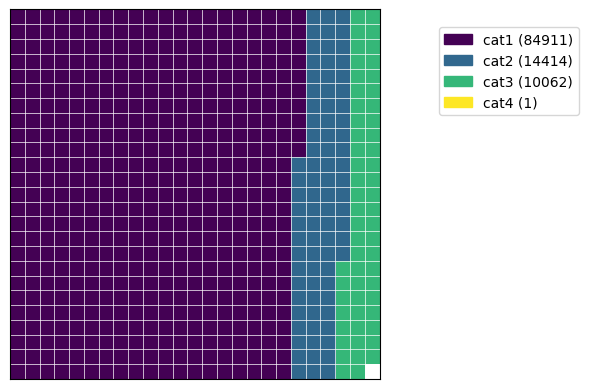

In [53]:
df5 = df.copy()
df5.loc[df5['categories'] == 'cat4', 'values'] = 1

waffle_plot(df5['categories'], df5['values'])

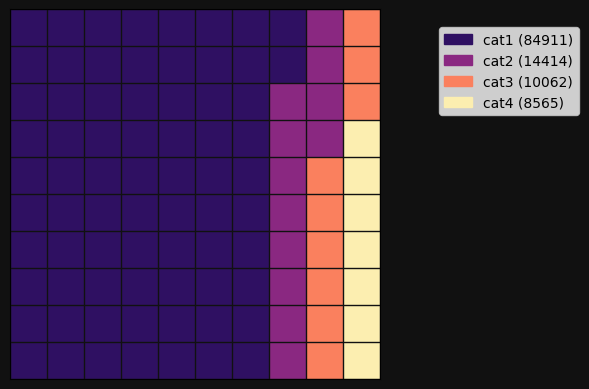

In [54]:
waffle_plot(df['categories'], df['values'], c=[violet, pinkish, orange, yellow], bc=blackish)

In [55]:
df

,categories,values
0,cat1,84911
1,cat2,14414
2,cat3,10062
3,cat4,8565


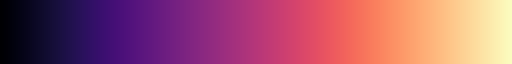

In [56]:
plt.cm.magma

In [57]:
yellow

(0.9882352941176471, 0.9333333333333333, 0.6901960784313725)

In [58]:
plt.cm.magma(255)

(0.987053, 0.991438, 0.749504, 1.0)

In [59]:
violet = plt.cm.magma(60)
pinkish = plt.cm.magma(101)
orange = plt.cm.magma(188)
yellow = plt.cm.magma(243)

In [60]:
blackish

(0.06666666666666667, 0.06666666666666667, 0.06666666666666667)

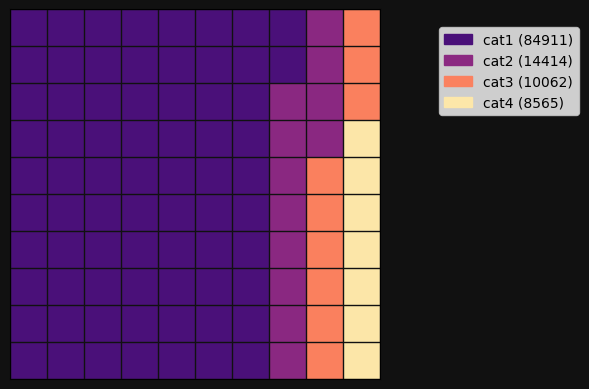

In [61]:
waffle_plot(df['categories'], df['values'], c=[violet, pinkish, orange, yellow], bc=blackish)

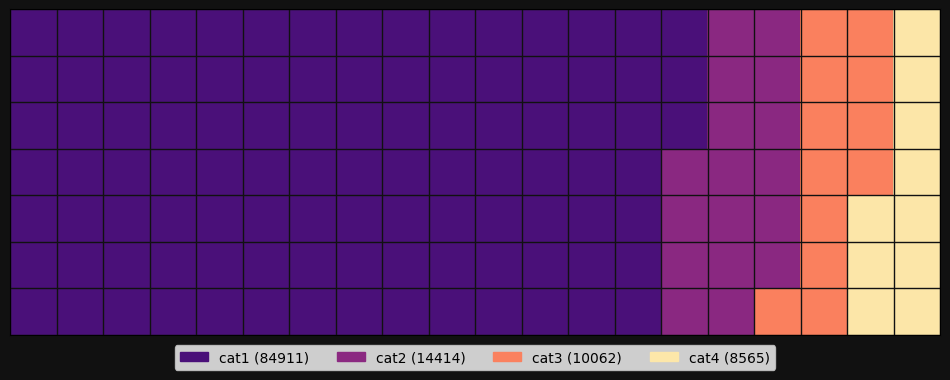

In [62]:
waffle_plot(df['categories'], df['values'], 20, 7, c=[violet, pinkish, orange, yellow], bc=blackish,
           figsize=(12,7), legend_ncols=len(df['categories']), legend_loc=(0.5, -0.13))

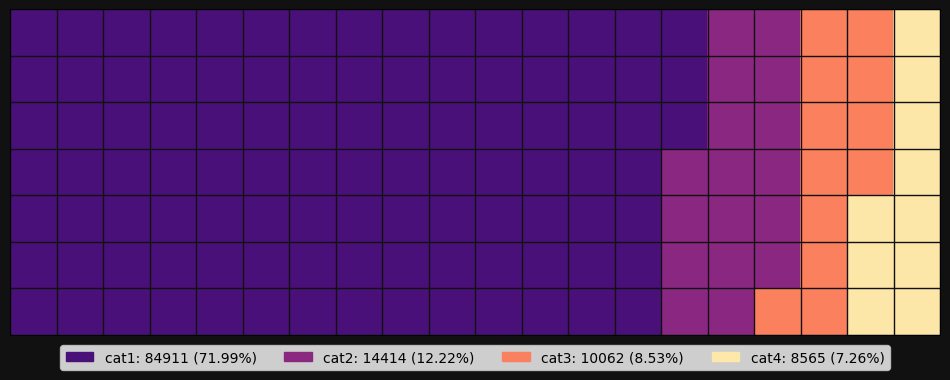

In [63]:
waffle_plot(df['categories'], df['values'], 20, 7, c=[violet, pinkish, orange, yellow], bc=blackish,
           figsize=(12,7), legend_ncols=len(df['categories']), legend_loc=(0.5, -0.13), label_p=True)

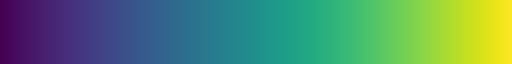

In [64]:
plt.cm.viridis

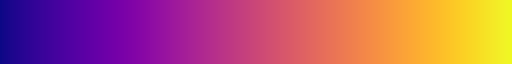

In [65]:
plt.cm.plasma

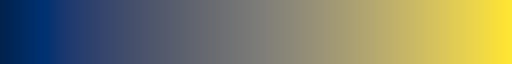

In [66]:
plt.cm.cividis

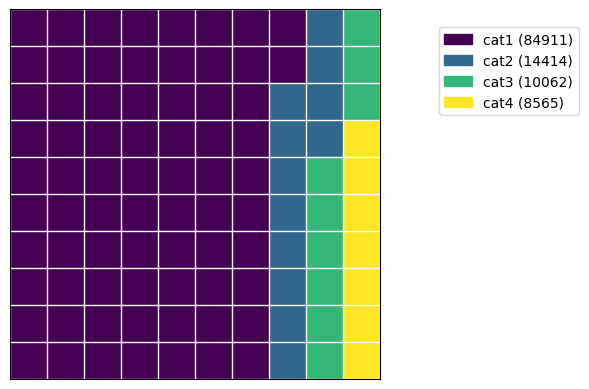

In [67]:
waffle_plot(df['categories'], df['values'])

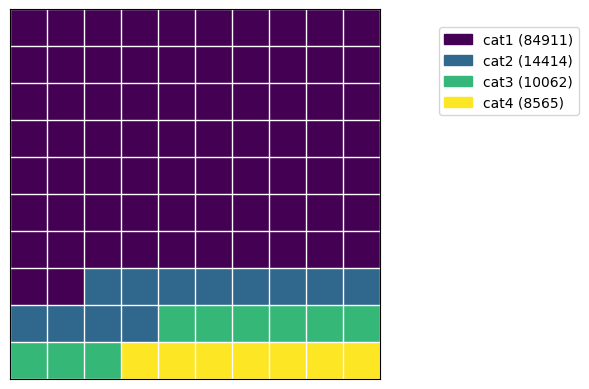

In [68]:
waffle_plot(df['categories'], df['values'], vertical=False)

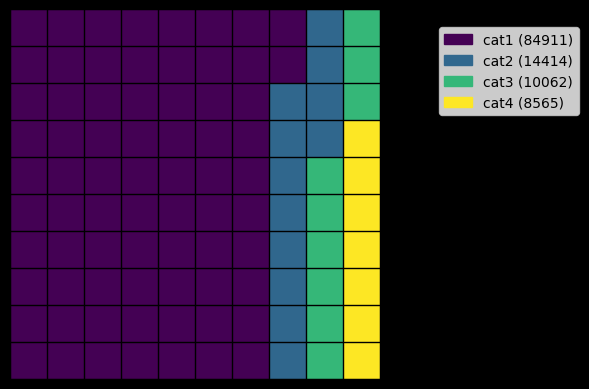

In [69]:
waffle_plot(df['categories'], df['values'], bc='k')

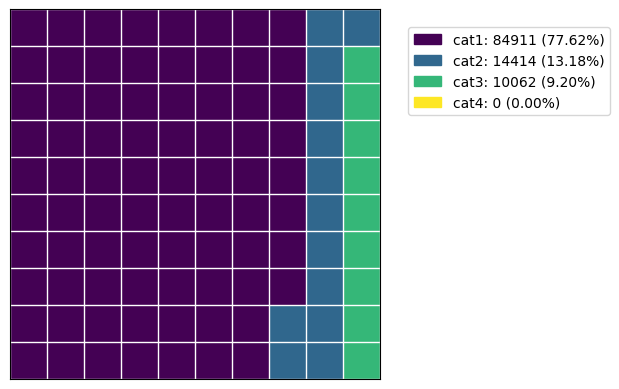

In [70]:
# one empty value
df1=df.copy()
df1.loc[df1['categories'] == 'cat4', 'values'] = 0

waffle_plot(df1['categories'], df1['values'], label_p=True)

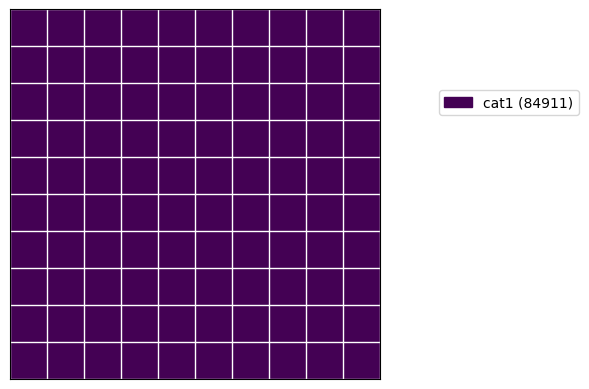

In [71]:
#Only one value present
df2 = df.head(1).copy()

waffle_plot(df2['categories'], df2['values'])

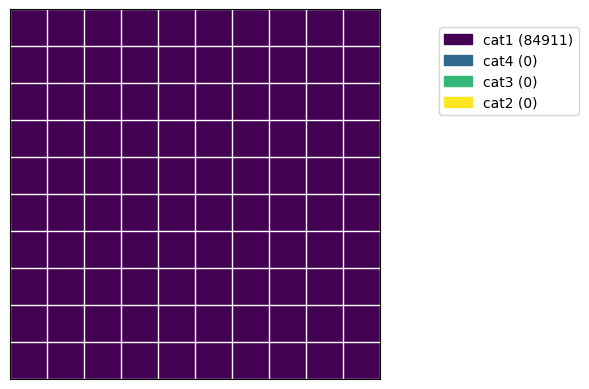

In [72]:
# Only one non-zero value
df3 = df.copy()
df3.loc[df3['categories'] != 'cat1', 'values'] = 0

waffle_plot(df3['categories'], df3['values'])

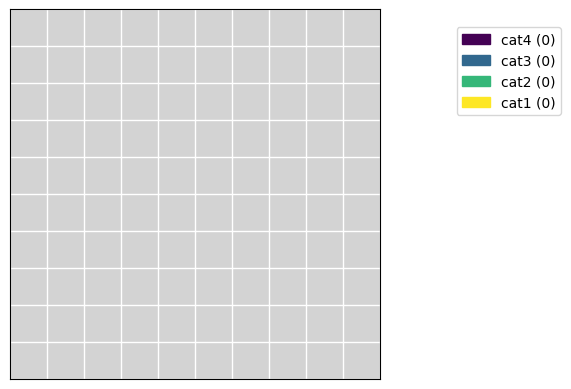

In [73]:
df4 = df.copy()
df4['values'] = 0

waffle_plot(df4['categories'], df4['values'])

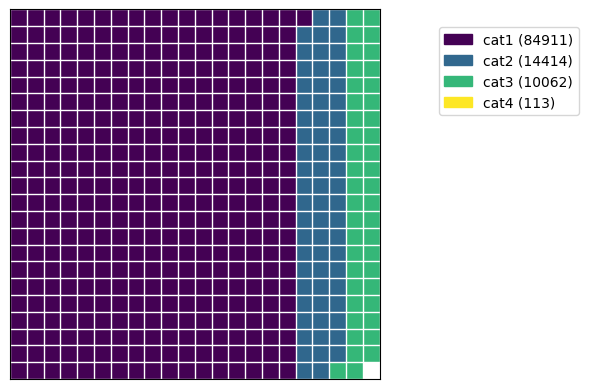

In [74]:
df6 = df.copy()
df6.loc[df6['categories'] == 'cat4', 'values'] = 113
waffle_plot(df6['categories'], df6['values'])

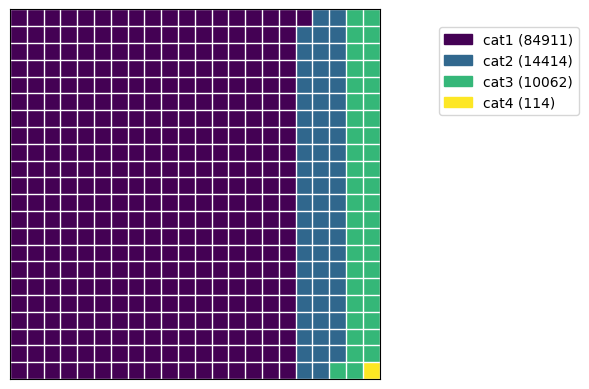

In [75]:
df6.loc[df6['categories'] == 'cat4', 'values'] = 114
waffle_plot(df6['categories'], df6['values'])

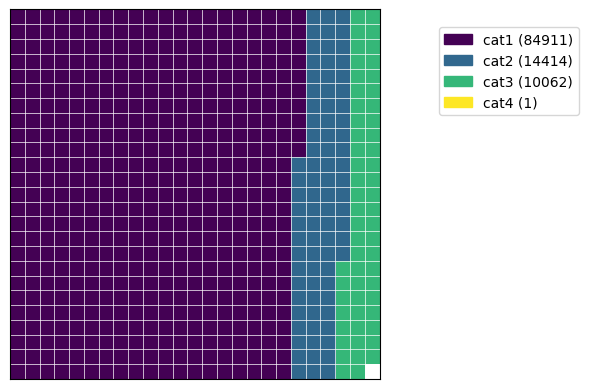

In [76]:
# Huge disproportion in the data
df5 = df.copy()
df5.loc[df5['categories'] == 'cat4', 'values'] = 1

waffle_plot(df5['categories'], df5['values'])

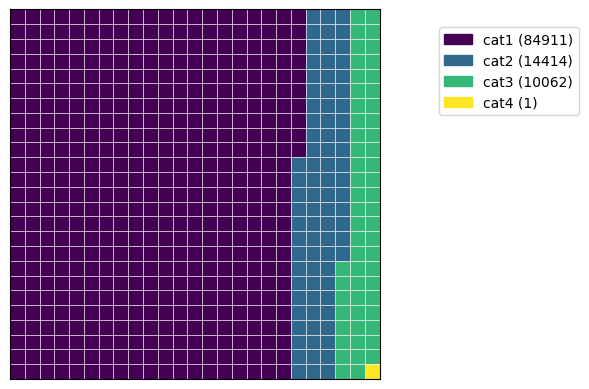

In [77]:
waffle_plot(df5['categories'], df5['values'], over_represent=True)

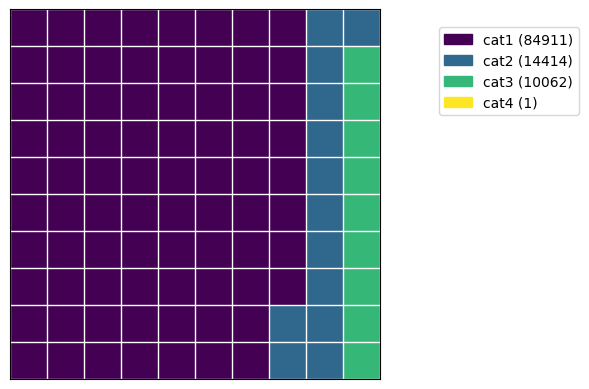

In [78]:
waffle_plot(df5['categories'], df5['values'], autoscale=False, over_represent=False)

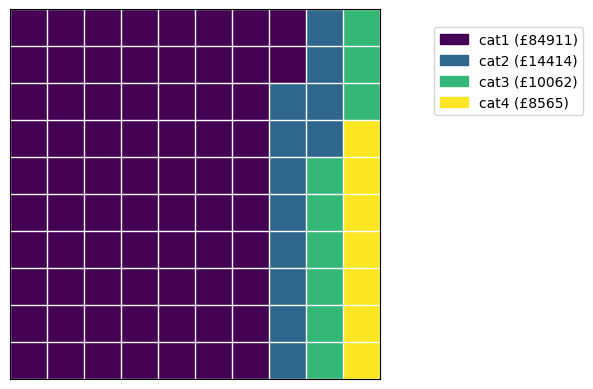

In [79]:
waffle_plot(df['categories'], df['values'], value_sign = '£')

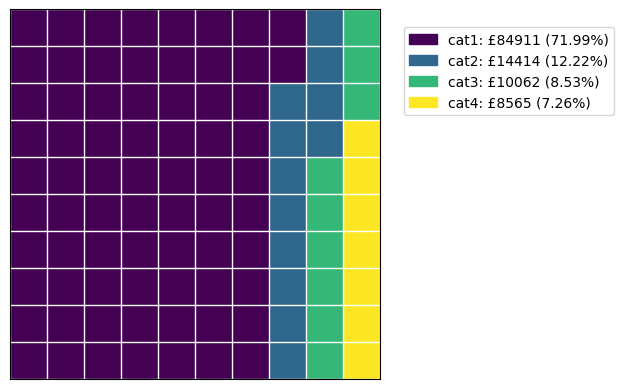

In [80]:
waffle_plot(df['categories'], df['values'], value_sign = '£', label_p=True)

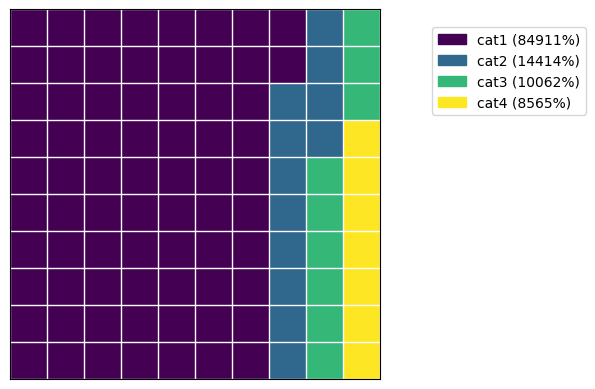

In [81]:
waffle_plot(df['categories'], df['values'], value_sign = '%')

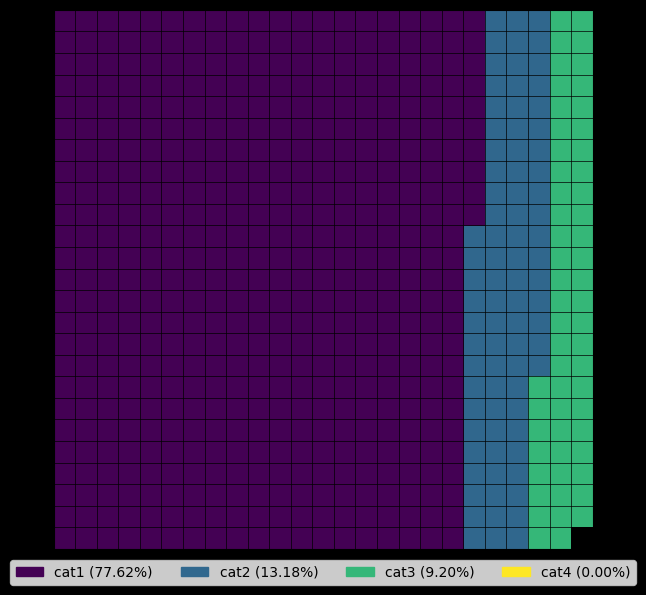

In [82]:
waffle_plot(df5['categories'], df5['values'], figsize=(7,7), label_v=False, label_p=True, 
            legend_ncols=len(df5['categories']), legend_loc=(0.50,-0.08), bc='k')

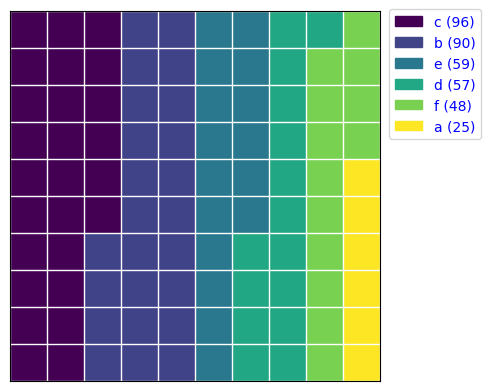

In [83]:
df = pd.DataFrame(columns=['categories', 'values'])

df['values'] = [25, 90, 96, 57, 59, 48]
df['categories'] = ['a', 'b','c', 'd', 'e', 'f']

waffle_plot(df['categories'], df['values'], font_c='blue', legend_loc=(1.15, 0.636))

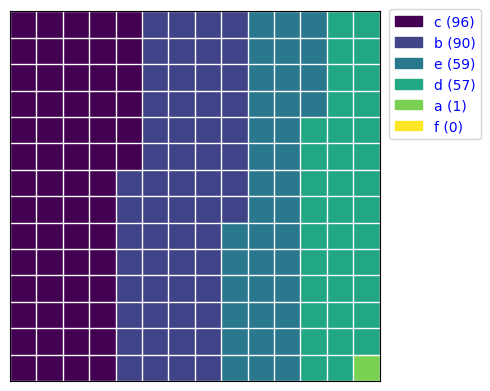

In [84]:
df = pd.DataFrame(columns=['categories', 'values'])

df['values'] = [1, 90, 96, 57, 59, 0]
df['categories'] = ['a', 'b','c', 'd', 'e', 'f']

waffle_plot(df['categories'], df['values'], font_c='blue', legend_loc=(1.15, 0.636))

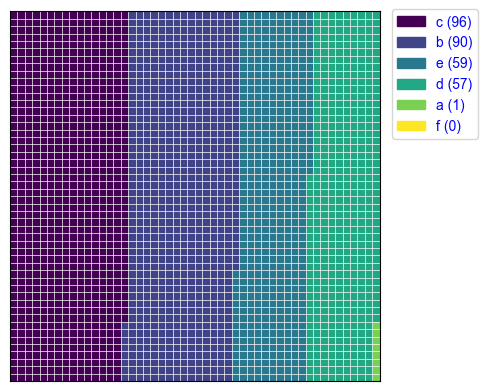

In [85]:
df = pd.DataFrame(columns=['categories', 'values'])

df['values'] = [1, 90, 96, 57, 59, 0]
df['categories'] = ['a', 'b','c', 'd', 'e', 'f']

waffle_plot(df['categories'], df['values'], font_c='blue', font='Arial', height=50, width=50, legend_loc=(1.15, 0.636))

In [86]:
import pandas as pd

# Let's make a default data frame with catagories and values.
df = pd.DataFrame({ 'categories': ['cat1', 'cat2', 'cat3', 'cat4'], 
                    'values': [84911, 14414, 10062, 8565] })

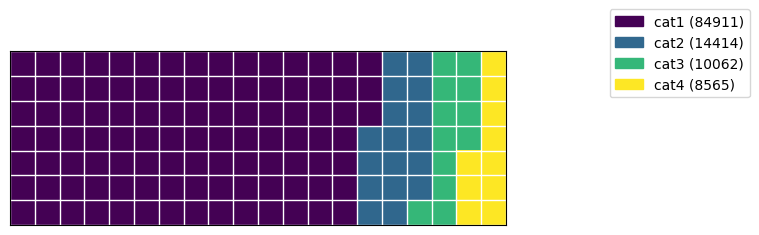

In [87]:
waffle_plot(df['categories'], df['values'], 20, 7)

If we want to change the colormap, we can:

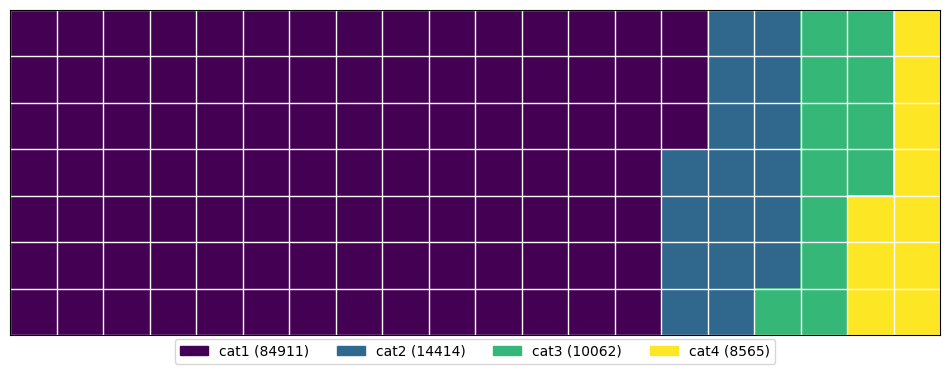

In [4]:
waffle_plot(df['categories'], df['values'], 20, 7, figsize=(12,7), legend_loc=(0.50,-0.11),
           legend_ncols=4)

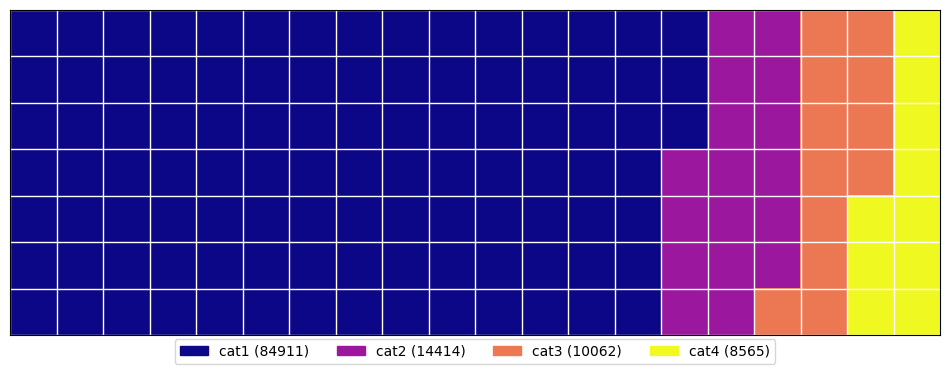

In [3]:
waffle_plot(df['categories'], df['values'], 20, 7, cmap=plt.cm.plasma, figsize=(12,7), legend_loc=(0.50,-0.11),
           legend_ncols=4)

If we pass a list of colors, those colors will be used instead:

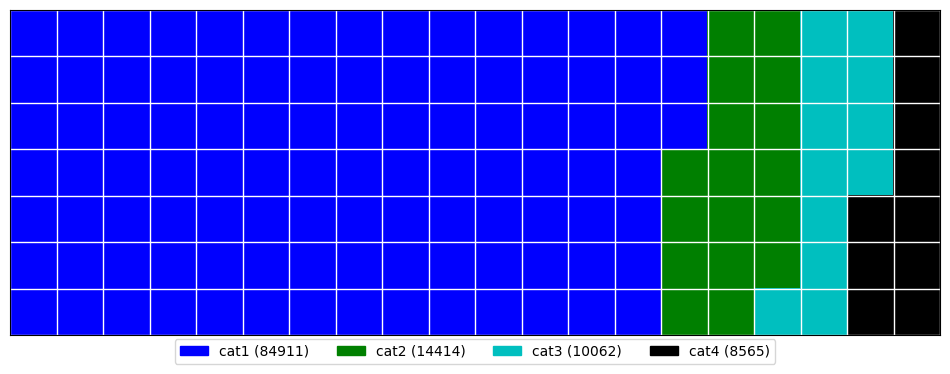

In [89]:
waffle_plot(df['categories'], df['values'], 20, 7, c=['b', 'g', 'c', 'k'], figsize=(12,7), legend_loc=(0.50,-0.11),
           legend_ncols=4)

And if we pass too few colors, the missing colors will be taken from colormap:

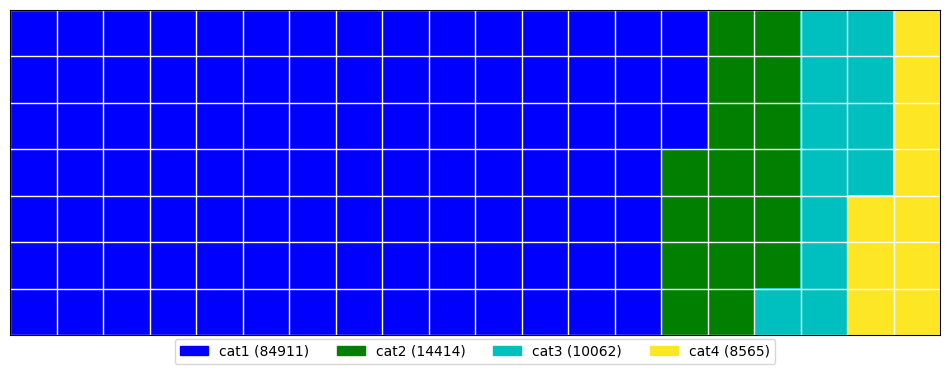

In [90]:
waffle_plot(df['categories'], df['values'], 20, 7, c=['b', 'g', 'c'], figsize=(12,7), legend_loc=(0.50,-0.11),
           legend_ncols=4)

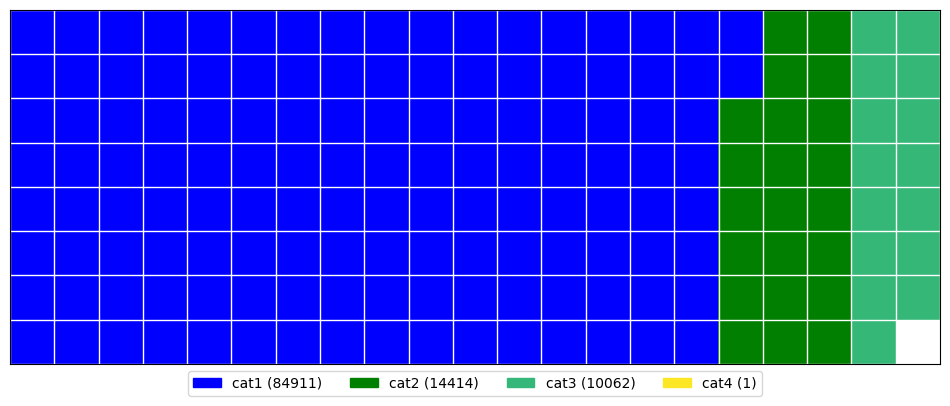

In [91]:
waffle_plot(df5['categories'], df5['values'], 20, 7, c=['b', 'g'], figsize=(12,7), legend_loc=(0.50,-0.11),
           legend_ncols=4)